In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from wordcloud import WordCloud
import collections

## 데이터 불러오기

In [3]:
raw_data1 = pd.read_csv('chunmoon_0611.csv')

In [4]:
raw_data1

,review,id,date,score,like,dislike
0,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019.12.26 09:19,9,3390,265
1,"천문, 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...",해바라기(assu****),2019.12.26 09:14,10,2714,400
2,"최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만, 역사 책에서 볼 ...",goo1****,2019.12.26 10:37,10,2351,264
3,백두산에서 온 알바들아~~평점테러 하지마라!! 백두산에 비하면 천문은 에레스트급이다,태태(atta****),2019.12.26 10:25,10,1889,340
4,간만에 본 대작입니다. 꼭보세요,쓰리디짱(ykjh****),2019.12.26 09:26,10,1450,166
...,...,...,...,...,...,...
12462,머그냥저냥볼만함그래도나쁘지않음,이정진(khmw****),2020.03.06 12:01,6,5,50
12463,생각보다 좀 허술한 구성. 연기력은 출중,trus****,2020.03.05 16:23,6,13,58
12464,약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들 ...,Jess(giss****),2020.03.05 07:39,6,12,68
12465,세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...,maxkim(maxk****),2020.02.29 13:27,4,25,144


## 분석

[기본정보 확인]

In [6]:
raw_data1.info()

raw_data1.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12467 entries, 0 to 12466
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   11125 non-null  object
 1   id       12467 non-null  object
 2   date     12467 non-null  object
 3   score    12467 non-null  int64 
 4   like     12467 non-null  int64 
 5   dislike  12467 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 584.5+ KB


,review,id,date,score,like,dislike
0,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019.12.26 09:19,9,3390,265
1,"천문, 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...",해바라기(assu****),2019.12.26 09:14,10,2714,400
2,"최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만, 역사 책에서 볼 ...",goo1****,2019.12.26 10:37,10,2351,264


review, id, date 는 object 타입이고, score, like, dislike칼럼은 인티저

[기본 통계치 확인]

In [7]:
raw_data1['score'].describe()

count    12467.000000
mean         8.809898
std          2.351330
min          1.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: score, dtype: float64

score컬럼의 통계치를 살펴보면 평점 평균은 8.81이며, 최소 평점은 1점, 최대 평점은 10점이다. 1분위(25%)에 해당하는 평점이 9점으로 전체 표본의 대다수가 9점이상의 높은 평점을 주었음을 알 수 있다. 반면, 대다수가 9점 이상의 평점을 매겼으나 평균은 중위값(10점)을 상당히 하회하는 8.81이므로 낮은 평점을 매긴 빈도수도 적지 않음을 짐작해 볼 수 있다. 따라서 다음으로 평점의 분포를 확인해보도록 하자

In [10]:
raw_data1['score'].value_counts()

10    8656
8      954
9      809
6      523
1      433
7      313
2      309
4      270
5      150
3       50
Name: score, dtype: int64

전체 12467개의 데이터 중 10점이 8656개로 압도적으로 많으며, 8점, 9점의 순으로 긍정적인 평가가 매우 높다. 3점의 빈도가 다른 평점 구간에 비해 매우 적은 특징을 보인다. 부정평가자들에게는 3점이 오히려 애매하게 높은 점수이며 1,2 점에 더 많은 평점을 매긴 것으로 생각된다.

In [11]:
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname = font_path).get_name()

plt.rcParams['font.family'] = font_name

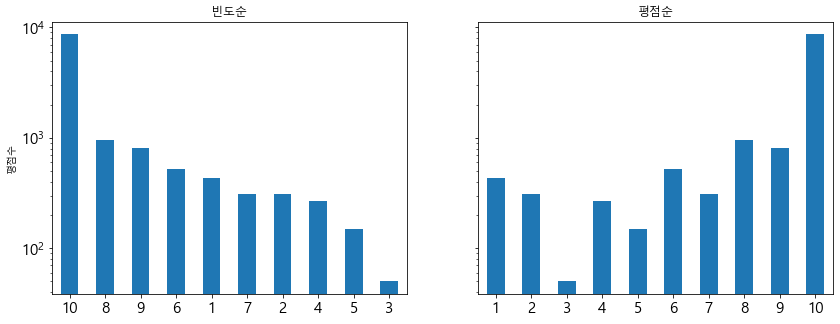

In [12]:
fig, ax = plt.subplots(1,2,figsize = (14,5), sharey = True)
raw_data1['score'].value_counts().plot.bar(ax = ax[0], logy = True, rot = 0, 
                                           title = '빈도순', ylabel = '평점수',
                                          fontsize = 15)
raw_data1['score'].value_counts().sort_index().plot.bar(ax = ax[1], logy = True, 
                                                        rot = 0, title = '평점순', 
                                                        fontsize = 15)

plt.show()

위와 같이 빈도순으로 살펴보면 전체적으로 7점이상의 평점이 앞서지만 1점의 평점수도 적지 않게 분포한다.

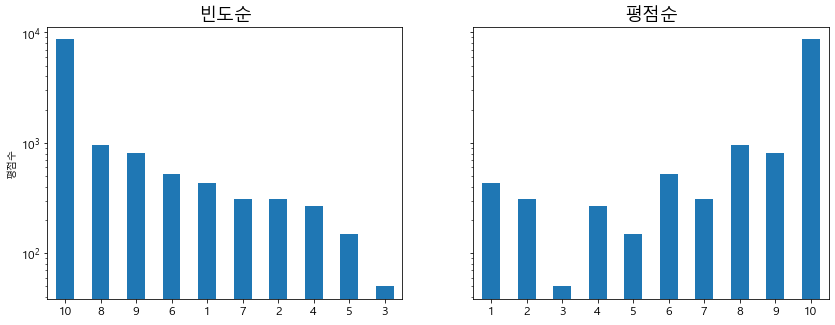

In [13]:
fig, ax = plt.subplots(1,2,figsize = (14,5), sharey = True)

plt.rcParams.update({'font.size': 15})

raw_data1['score'].value_counts().plot.bar(ax = ax[0], logy = True, rot = 0, 
                                           title = '빈도순', ylabel = '평점수',
                                          fontsize = 12)
raw_data1['score'].value_counts().sort_index().plot.bar(ax = ax[1], logy = True, 
                                                        rot = 0, title = '평점순', 
                                                        fontsize = 12)
plt.show()

분포 비교 (7점 이상 vs 6점이하)

In [16]:
# 7점 이상 : 10732 개
raw_data1.loc[raw_data1['score'] >= 7,['score']]

,score
0,9
1,10
2,10
3,10
4,10
...,...
12324,9
12372,7
12393,7
12449,7


In [17]:
raw_data1.loc[raw_data1['score'] >= 7,['score']].value_counts()

score
10       8656
8         954
9         809
7         313
dtype: int64

In [18]:
# 6점 이하 : 1735개
raw_data1.loc[raw_data1['score'] <= 6,['score']]

,score
92,2
97,6
116,6
258,6
259,5
...,...
12462,6
12463,6
12464,6
12465,4


In [19]:
raw_data1.loc[raw_data1['score'] <= 6,['score']].value_counts()

score
6        523
1        433
2        309
4        270
5        150
3         50
dtype: int64

In [20]:
# 4점 이하 : 1062개
raw_data1.loc[raw_data1['score'] <= 4,['score']]

,score
92,2
322,1
323,4
332,4
354,1
...,...
12457,1
12458,1
12459,1
12465,4


In [21]:
print("7점이상:", len(raw_data1.loc[raw_data1['score'] >= 7,['score']])/len(raw_data1))
print("6점이하:", len(raw_data1.loc[raw_data1['score'] <= 6,['score']])/len(raw_data1))
print("4점이하:", len(raw_data1.loc[raw_data1['score'] <= 4,['score']])/len(raw_data1))

7점이상: 0.8608325980588755
6점이하: 0.13916740194112456
4점이하: 0.08518488810459614


7점이상의 고평점은 전체의 86%인 10732개, 6점이하의 중/저평점은 14%인 1735개이며, 4점이하의 저평점은 8.5%인 1062개이다.

#### 7-2. 단어 빈도 분석

형태소 분석

In [23]:
raw_data1['review'][0]

'한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 끝을 보여줌. '

In [24]:
review_text = re.sub("[^가-힣]", " ", raw_data1['review'][0])

In [25]:
print(review_text)

한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다  세종대왕 연기의 끝을 보여줌  


In [26]:
# 형태소 분석

okt = Okt()

In [27]:
review_text = okt.nouns(review_text)
print(review_text)

['한석규', '세종', '저런', '연기', '의문', '세종대왕', '연기', '끝']


In [28]:
text_final = raw_data1['review'].astype('str')

In [29]:
text_final[0]

'한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 끝을 보여줌. '

In [30]:
text_token = [okt.nouns(text) for text in text_final]

In [31]:
text_token[10]

['하나', '꽉', '채운', '작품']

In [32]:
text_token_all = np.sum(text_token)

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [33]:
text_token_all2 = [word for word in text_token_all if len(word) >= 2]

In [34]:
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 800, height = 600, max_words = 100, collocations = False).generate(' '.join(text_token_all2))

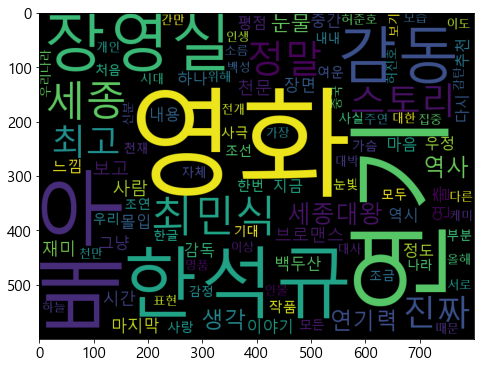

In [35]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud)
plt.show()

In [37]:
outwords = ['영화','최민식','한석규','배우','세종','세종대왕','장영실']

In [38]:
text_token_all3 = [word for word in text_token_all2 if word not in outwords]

In [39]:
wordcloud2 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 800, height = 600, max_words = 100, collocations = False).generate(' '.join(text_token_all3))

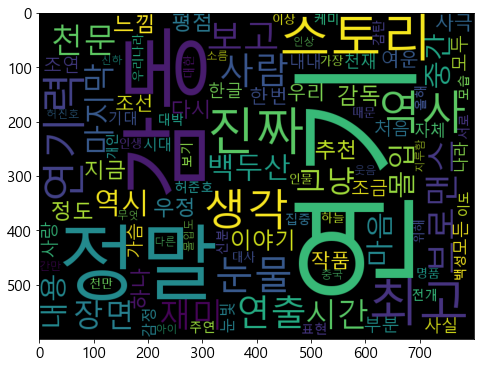

In [40]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud2)
plt.show()

#### [단어빈도분석 : 7점 이상 vs 6점 이하 비교 검토]

In [41]:
# 7점 이상 리뷰
reviews_more7 = raw_data1.loc[raw_data1['score'] >= 7]

In [42]:
# 6점 이하 리뷰
reviews_less6 = raw_data1.loc[raw_data1['score'] <= 6]

In [43]:
reviews_more7

,review,id,date,score,like,dislike
0,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019.12.26 09:19,9,3390,265
1,"천문, 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...",해바라기(assu****),2019.12.26 09:14,10,2714,400
2,"최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만, 역사 책에서 볼 ...",goo1****,2019.12.26 10:37,10,2351,264
3,백두산에서 온 알바들아~~평점테러 하지마라!! 백두산에 비하면 천문은 에레스트급이다,태태(atta****),2019.12.26 10:25,10,1889,340
4,간만에 본 대작입니다. 꼭보세요,쓰리디짱(ykjh****),2019.12.26 09:26,10,1450,166
...,...,...,...,...,...,...
12324,한석규는 8월의 크리스마스 뿐만이 아니라 텔미썸씽도 심은하와 같이 했는데 최민식과는...,포대화상미륵존여래불(baks****),2020.01.03 01:26,9,2,9
12372,솔직히 기대에 못미침..최민식 믿고 간건데 장영실이랑 좀 안어울린단 느낌을 받았고 ...,헤븐(ssun****),2019.12.27 21:59,7,3,11
12393,이 배우들을 데리고 멜로를 만들었네요..기대에 비해 약간 실망스러워요,goo9****,2019.12.27 21:25,7,2,11
12449,크...20년전 대박 영화 쉬리에선 한석규가 한국 최고 배우였고 최민식은 듣보였는데...,a(wiii****),2019.12.28 00:20,7,1,14


In [44]:
okt = Okt()

[7점 이상]

In [45]:
text_token_more7 = [okt.nouns(text) for text in reviews_more7['review'].astype('str')]

In [46]:
text_token_all_more7 = np.sum(text_token_more7)
text_token_all2_more7 = [word for word in text_token_all_more7 if len(word) >= 2]

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [47]:
outwords = ['영화','최민식','한석규','배우','세종','세종대왕','장영실']

In [48]:
text_token_all3_more7 = [word for word in text_token_all2_more7 if word not in outwords]

In [49]:
wordcloud_more7 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 800, height = 600, max_words = 100, collocations = False).generate(' '.join(text_token_all3_more7))

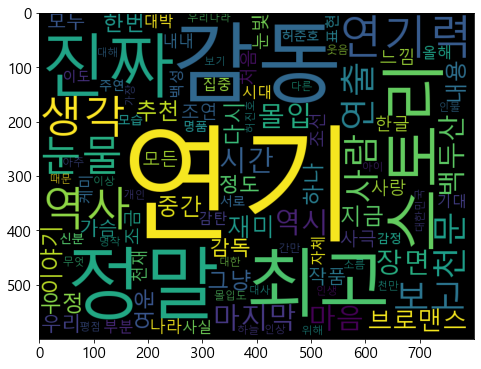

In [50]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud_more7)
plt.show()

[6점 이하]

In [51]:
text_token_less6 = [okt.nouns(text) for text in reviews_less6['review'].astype('str')]

In [52]:
text_token_all_less6 = np.sum(text_token_less6)
text_token_all2_less6 = [word for word in text_token_all_less6 if len(word) >= 2]

In [53]:
wordcloud_less6 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 800, height = 600, max_words = 100, collocations = False).generate(' '.join(text_token_all2_less6))

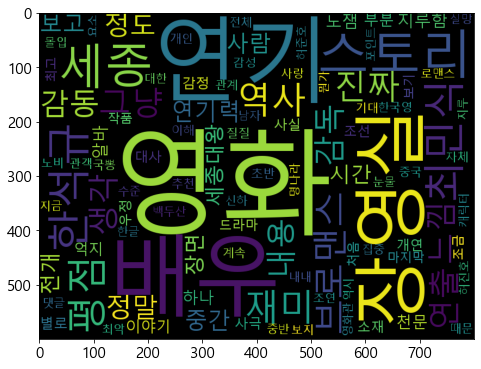

In [54]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud_less6)
plt.show()

In [55]:
outwords = ['영화','최민식','한석규','배우','세종','세종대왕','장영실']

In [56]:
text_token_all3_less6 = [word for word in text_token_all2_less6 if word not in outwords]

In [57]:
wordcloud_less6_2 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 800, height = 600, max_words = 100, collocations = False).generate(' '.join(text_token_all3_less6))

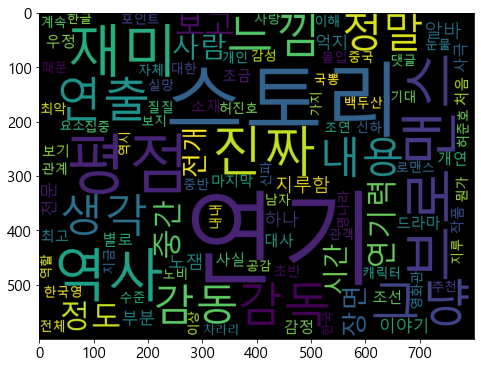

In [58]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud_less6_2)
plt.show()

전체 텍스트 데이터에 대해서 명사를 추출하고 단어 빈도에 따른 워드클라우드로 표현해보면 긍정리뷰가 압도적으로 많은 관계로 부정평가 리뷰의 텍스트들이 잘 드러나지 않는다. 이에 따라 평점 7이상(긍정리뷰)와 평점 6이하(부정리뷰)로 데이터를 나누어 워드클라우드로 표현해보면, 위와 같이 대조적인 단어들이 눈에 띈다. 대표적으로 부정리뷰의 단어 중 노잼, 지루함, 억지, 브로맨스 등의 단어가 눈에 띄며, `알바`, `백두산`등의 단어가 특징적으로 보인다.

[단어빈도 검토]

1. 긍정리뷰

In [59]:
counting_posi = collections.Counter(text_token_all3_more7)

In [60]:
counting_posi_top100 = counting_posi.most_common(100)

2. 부정리뷰

In [61]:
counting_nega = collections.Counter(text_token_all3_less6)

In [62]:
counting_nega_top100 = counting_nega.most_common(100)

In [63]:
counting_nega_top100[:10]

[('연기', 496),
 ('스토리', 292),
 ('평점', 178),
 ('브로맨스', 141),
 ('역사', 135),
 ('재미', 133),
 ('진짜', 117),
 ('그냥', 115),
 ('연출', 113),
 ('느낌', 112)]

In [64]:
print("긍정리뷰 '알바' 언급 횟수 :", text_token_all3_more7.count('알바'))
print("부정리뷰 '알바' 언급 횟수 :", text_token_all3_less6.count('알바'))     

긍정리뷰 '알바' 언급 횟수 : 32
부정리뷰 '알바' 언급 횟수 : 74


긍정리뷰와 부정리뷰에서 `알바` 언급 횟수는 위와 같이 부정리뷰에서 상대적으로 매우 많게 나타났다. 영화에 부정적인 평가를 내린 사람들이 긍정평가에 대한 상당한 의혹을 가지는 것으로 보인다.

긍정평가자들도 역시 해당 단어를 29회나 언급한 점은 흥미롭다.

**[백두산은 왜 언급할까?]**

부정리뷰(6점 이하) 중 백두산 언급 데이터 검토 

In [66]:
p_bakdusan = re.compile('백두산')

In [67]:
raw_data1.loc[raw_data1['score']<=6]['review'].iloc[1]

'담담한 서술이 밋밋하고 다소 지루하게 느겨지는 부분은 많이 아쉬운 부분이네요. 픽션이 너무 많아 집중이 어려웠던 점도 배우들의 연기가 많이 가려진 부분이 아닌가 합니다. 그래도 나름 자료가 많은조선시대의 시나리오인대 완성도가 많이 허술하게 느겨졌네요. '

In [68]:
result = []

for review in raw_data1.loc[raw_data1['score']<=6]['review']:
    if p_bakdusan.search(str(review)):
        result.append(True)
    else: result.append(False)

In [69]:
np.bincount(result)

array([1705,   30], dtype=int64)

In [70]:
raw_data1.loc[raw_data1['score']<=6][result].head(5)

,review,id,date,score,like,dislike
541,한석규와 최민식의 키스신이 나올 것 같은 분위기가 2시간 동안 지루하게 계속됨. 1...,aram****,2020.01.05 19:39,4,16,9
702,중반부터 갑자기 내가 이 영화를 왜 보고 있지 하는 생각만 들게되는세종과 장영실을 ...,이수림(zudq****),2019.12.27 14:38,1,13,7
1778,세종과 장영실의 관계가 이렇게도 지루하고 오그라들었던 사이란 말인가. 백두산에 이어...,다른이름(gods****),2019.12.26 23:48,5,9,5
3581,알바아닙니다. 백두산 보고 이거 본건데. 요즘 한국영화 다 똑같네요. 끝물인가봅니다.,파급효과(yidd****),2020.01.06 03:10,6,5,2
6477,실망이 크네요....백두산에 실망한거 천문으로 달래보려고 햇는데.... 영화 내내 ...,skfnsfg(chan****),2019.12.29 01:57,1,12,10


위 결과를 보면 5개만 살펴본 것이지만, 전반적으로 백두산에 대해서도 부정적인 의견을 보이고 있다.  
첫번재 댓글을 살펴보자

In [71]:
raw_data1.loc[raw_data1['score']<=6]['review'][result].iloc[0]

'한석규와 최민식의 키스신이 나올 것 같은 분위기가 2시간 동안 지루하게 계속됨. 1월 1일부터 정말 최악의 영화를 봄. 어짜피 뻔한 스토리라해도 백두산 봤으면 볼만한 장면이라도 건졌을... 카라멜 팝콘만 맛있게 먹고 옴. '

위 부정 리뷰 중 백두산 언급한 리뷰를 공감/비공감으로 정렬해보자

In [73]:
neg_bakdu = raw_data1.loc[raw_data1['score']<=6][result]

In [74]:
# 공감 순 정렬
neg_bakdu.sort_values('like', ascending = False).head(10)

,review,id,date,score,like,dislike
541,한석규와 최민식의 키스신이 나올 것 같은 분위기가 2시간 동안 지루하게 계속됨. 1...,aram****,2020.01.05 19:39,4,16,9
702,중반부터 갑자기 내가 이 영화를 왜 보고 있지 하는 생각만 들게되는세종과 장영실을 ...,이수림(zudq****),2019.12.27 14:38,1,13,7
6477,실망이 크네요....백두산에 실망한거 천문으로 달래보려고 햇는데.... 영화 내내 ...,skfnsfg(chan****),2019.12.29 01:57,1,12,10
9259,여기 평점 주는거 알바생들같네... 연기는 솔직히 인정한다만... 한국영화 제작비...,야미카시(tygh****),2019.12.29 13:31,2,11,10
1778,세종과 장영실의 관계가 이렇게도 지루하고 오그라들었던 사이란 말인가. 백두산에 이어...,다른이름(gods****),2019.12.26 23:48,5,9,5
12350,지루하다...백두산이 훨 난 듯,ljmi****,2019.12.26 11:01,1,8,15
12437,진짜 사극 안좋아 하는데 평점 엄청 좋아서 일끝나고 야간에 방문 본인은 백두산 시동...,김재철(okjo****),2019.12.27 01:27,1,7,18
11493,출연자들의 연기력은 좋았다. 장영실의 발명품들을 볼 때는 저 시절에 어떻게 저렇게 ...,wdlhy(qmff****),2019.12.27 02:07,5,5,6
12083,신인 감독이 사극 영화 도전한 느낌이었는데영화 끝난 후 찾아보니 덕혜옹주 만든 감독...,JHyeon(wlgu****),2020.01.05 01:38,4,5,9
12459,영화 아직 안봐서 궁금해서 질문드림니다 혹시 백두산하고 천문 둘중 어떤게 보는게 괜...,vkfk****,2019.12.26 09:44,1,5,36


In [75]:
# 비공감 순 정렬
neg_bakdu.sort_values('dislike', ascending = False).head(10)

,review,id,date,score,like,dislike
12459,영화 아직 안봐서 궁금해서 질문드림니다 혹시 백두산하고 천문 둘중 어떤게 보는게 괜...,vkfk****,2019.12.26 09:44,1,5,36
12437,진짜 사극 안좋아 하는데 평점 엄청 좋아서 일끝나고 야간에 방문 본인은 백두산 시동...,김재철(okjo****),2019.12.27 01:27,1,7,18
12350,지루하다...백두산이 훨 난 듯,ljmi****,2019.12.26 11:01,1,8,15
12418,"천문 추천, 백두산 반대",한지연(gksw****),2019.12.26 11:36,5,3,13
12417,백두산이 더 재밌는거 갔아용,동전지갑(juji****),2019.12.26 18:05,1,3,13
12370,정말 기대를 많이 하고 봤는데요.. 장영실과 세종의 만남이라는 좋은 소재와 훌륭한 ...,SJ(aef3****),2019.12.31 03:00,4,3,11
6477,실망이 크네요....백두산에 실망한거 천문으로 달래보려고 햇는데.... 영화 내내 ...,skfnsfg(chan****),2019.12.29 01:57,1,12,10
9259,여기 평점 주는거 알바생들같네... 연기는 솔직히 인정한다만... 한국영화 제작비...,야미카시(tygh****),2019.12.29 13:31,2,11,10
12404,영화 백두산보다 낳긴 낳으나 지루하긴 지루하다 이것은 감독 역량 부족인듯싶다 또영화...,완치확정현석(glgl****),2020.01.30 05:40,2,0,10
12390,"지루해요최근본것중엔 제일 별로였어요 (백두산, 시동)",거위의꿈(cosm****),2019.12.26 17:57,6,1,10


In [76]:
# 비공감 최대 댓글
neg_bakdu.sort_values('dislike', ascending = False)['review'].iloc[0]

'영화 아직 안봐서 궁금해서 질문드림니다 혹시 백두산하고 천문 둘중 어떤게 보는게 괜찮을까요? 모바일로 1인 패키지 표있는데 어떤걸 봐야될지 고민됨니다 백두산이면 좋아요 아니면 안종아요 부탁좀드림니다 이런데에 이런 글 적어 진심으로 죄송합니다 '

이처럼 이상한 데이터도 있다..

#### nick과 id 분리

In [94]:
# id 8자리 추출 정규식 패턴
p_id = re.compile('[^가-힣]{4}\*{4}')

In [95]:
id_result = []
for i in raw_data1['id']:
    id_result.append(p_id.search(i)[0])

In [96]:
len(id_result)

12467

---

참고 : 정규표현식을 [A-z0-9.+]{4}\*{4}로 작성하면 TypeError 발생 try ~ except 구문 이용하여 error 발생한 id를 확인하고 정규표현식을 수정한다

In [97]:
try:
    for idx, idn in enumerate(raw_data1['id']):
        print(p_id.search(idn)[0])
except TypeError as e:
    print(idx)

trym****
assu****
goo1****
atta****
ykjh****
wldu****
smj9****
ador****
love****
ecok****
siri****
popo****
elli****
yjap****
dbsw****
song****
wowl****
1sac****
bilo****
dc2a****
bomb****
k143****
tlub****
tjdw****
kim0****
yeso****
bagu****
seon****
stan****
dksd****
xxmo****
hane****
with****
pjt0****
77yj****
kjwo****
khss****
joop****
yk_j****
zy51****
fata****
lgm0****
ekql****
pick****
hyer****
mc74****
rlat****
gusg****
jueu****
tjsa****
ehdb****
zuno****
qksw****
afgh****
eunm****
terr****
cosm****
jsho****
dlal****
67lg****
skj2****
ydhs****
pale****
w3i4****
eet4****
rndu****
adsl****
cyjn****
chda****
chan****
jind****
kimi****
h40g****
yoon****
ssum****
sdwt****
km6a****
bin2****
bier****
zsyl****
jogu****
simc****
ddov****
pilo****
edxa****
soon****
mu_r****
aha1****
chw0****
rhdl****
doya****
mulc****
jmg_****
lktk****
xvv3****
obe3****
hero****
anyt****
iamj****
ckrg****
jqh5****
awd1****
emp3****
soft****
docc****
gaeu****
jwch****
vv3n****
psg8****
hanh****
kokq****
n

---

#### 닉과 id를 분리한 raw_data2 데이터프레임 생성

In [98]:
raw_data2 = raw_data1.copy()

In [99]:
raw_data2

,review,id,date,score,like,dislike
0,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019.12.26 09:19,9,3390,265
1,"천문, 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...",해바라기(assu****),2019.12.26 09:14,10,2714,400
2,"최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만, 역사 책에서 볼 ...",goo1****,2019.12.26 10:37,10,2351,264
3,백두산에서 온 알바들아~~평점테러 하지마라!! 백두산에 비하면 천문은 에레스트급이다,태태(atta****),2019.12.26 10:25,10,1889,340
4,간만에 본 대작입니다. 꼭보세요,쓰리디짱(ykjh****),2019.12.26 09:26,10,1450,166
...,...,...,...,...,...,...
12462,머그냥저냥볼만함그래도나쁘지않음,이정진(khmw****),2020.03.06 12:01,6,5,50
12463,생각보다 좀 허술한 구성. 연기력은 출중,trus****,2020.03.05 16:23,6,13,58
12464,약간 지루해서 내용이 기억이 잘 안나요.내용이 영화에서 본건지 꿈에서 본건지 애들 ...,Jess(giss****),2020.03.05 07:39,6,12,68
12465,세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...,maxkim(maxk****),2020.02.29 13:27,4,25,144


In [100]:
len(id_result)

12467

In [101]:
raw_data2['id2'] = id_result

In [102]:
raw_data2.head(5)

,review,id,date,score,like,dislike,id2
0,한석규의 세종은 어떻게 해야 저런 연기가 가능한지 의문을 남긴다. 세종대왕 연기의 ...,Neuj(trym****),2019.12.26 09:19,9,3390,265,trym****
1,"천문, 천만될 가능성이 높습니다.다만 백두산에 상영관 밀리는 게 아쉽네요.정말 재미...",해바라기(assu****),2019.12.26 09:14,10,2714,400,assu****
2,"최민식과 한석규라를 두 배우만으로도 볼 이유가 충분했던 영화지만, 역사 책에서 볼 ...",goo1****,2019.12.26 10:37,10,2351,264,goo1****
3,백두산에서 온 알바들아~~평점테러 하지마라!! 백두산에 비하면 천문은 에레스트급이다,태태(atta****),2019.12.26 10:25,10,1889,340,atta****
4,간만에 본 대작입니다. 꼭보세요,쓰리디짱(ykjh****),2019.12.26 09:26,10,1450,166,ykjh****


칼럼 순서 정리

In [105]:
cols = ['review', 'id', 'id2', 'date', 'score', 'like', 'dislike']

In [106]:
raw_data2 = raw_data2[cols]

In [107]:
raw_data2.tail(2)

,review,id,id2,date,score,like,dislike
12465,세종대왕과 장영실이라는 훌륭한 소재로 이렇게 재미없게 영화를 만들 수 있다니 놀랍습...,maxkim(maxk****),maxk****,2020.02.29 13:27,4,25,144
12466,어색한 브로맨스 질질끄는 지루함,Yim(kawa****),kawa****,2020.02.28 20:33,2,33,175


동일 id 검색 : 다른 사람일지라도 앞 4자리는 아이디가 동일할 수 있으므로 같은 아이디가 검색되었다고 해서 같은 사람이라고 단정할 수 없으나, 다른 피쳐들을 살펴봄으로써 어느 정도 특성 파악이 가능할 것

In [108]:
id2_freq = collections.Counter(raw_data2['id2'])

In [109]:
id2_freq.most_common(10)

[('love****', 59),
 ('blue****', 25),
 ('shin****', 24),
 ('jung****', 24),
 ('park****', 23),
 ('kims****', 21),
 ('happ****', 21),
 ('sung****', 19),
 ('dong****', 18),
 ('hyun****', 18)]

In [110]:
raw_data2[(raw_data2['id2'] == 'love****')]['score'][:5]

8      10
343     8
612    10
650     9
735    10
Name: score, dtype: int64

<AxesSubplot:>

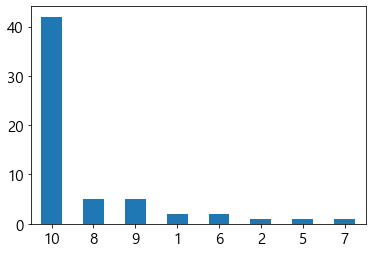

In [111]:
raw_data2[(raw_data2['id2'] == 'love****')]['score'].value_counts().plot.bar(rot = 0)

In [112]:
raw_data2[(raw_data2['id2'] == 'love****')]['score'].value_counts()

10    42
8      5
9      5
1      2
6      2
2      1
5      1
7      1
Name: score, dtype: int64

<AxesSubplot:title={'center':'빈도순'}, ylabel='평점수'>

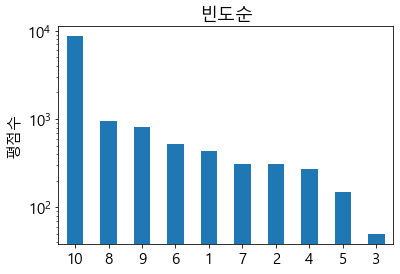

In [113]:
raw_data1['score'].value_counts().plot.bar(logy = True, rot = 0, 
                                           title = '빈도순', ylabel = '평점수',
                                          fontsize = 15)

love**** 라는 아이디가 남긴 평점 분포와 전체 데이터의 평점 분포를 비교해보면 특별한 점이 눈에 띄지 않으며 상당히 비슷한 분포로 판단된다.

다음으로 nick+id 가 같은 사람이 있는지 살펴보자

In [115]:
id_freq = collections.Counter(raw_data2['id'])

In [116]:
id_freq.most_common(10)

[('love****', 11),
 ('park****', 6),
 ('rlaw****', 5),
 ('andr****', 5),
 ('whit****', 5),
 ('jung****', 5),
 ('good****', 5),
 ('choi****', 4),
 ('1004****', 4),
 ('hans****', 4)]

In [117]:
id_freq.most_common(20)

[('love****', 11),
 ('park****', 6),
 ('rlaw****', 5),
 ('andr****', 5),
 ('whit****', 5),
 ('jung****', 5),
 ('good****', 5),
 ('choi****', 4),
 ('1004****', 4),
 ('hans****', 4),
 ('김소정(ksjm****)', 4),
 ('sung****', 4),
 ('사바자다라안무(vast****)', 4),
 ('youn****', 4),
 ('wlsd****', 3),
 ('blue****', 3),
 ('lead****', 3),
 ('hyun****', 3),
 ('leej****', 3),
 ('nike****', 3)]

`김소정(ksjm****)`과 `사바자다라안무(vast****)` 검토

In [118]:
raw_data2[raw_data2['id']=='사바자다라안무(vast****)']

,review,id,id2,date,score,like,dislike
1678,가족과 함께 보기 좋은 영화에요. 배우들 연기가 좋았음,사바자다라안무(vast****),vast****,2019.12.26 22:08,10,5,1
3500,가족과 함께 보기 좋은 영화에요. 배우들 연기가 좋았음,사바자다라안무(vast****),vast****,2019.12.26 22:08,10,4,1
5304,가족과 함께 보기 좋은 영화에요. 배우들 연기가 좋았음,사바자다라안무(vast****),vast****,2019.12.26 22:08,10,2,0
7729,가족과 함께 보기 좋은 영화에요. 배우들 연기가 좋았음,사바자다라안무(vast****),vast****,2019.12.26 22:08,10,1,0


In [119]:
raw_data2[raw_data2['id']=='김소정(ksjm****)']

,review,id,id2,date,score,like,dislike
581,너무 잘봤다 중간부터 울면서 봐야하니까 화장하지 마시고 .. 역사적 상상력이 과하지...,김소정(ksjm****),ksjm****,2020.01.02 23:03,10,6,0
796,너무 잘봤다 중간부터 울면서 봐야하니까 화장하지 마시고 .. 역사적 상상력이 과하지...,김소정(ksjm****),ksjm****,2020.01.02 23:03,10,5,0
1229,너무 잘봤다 중간부터 울면서 봐야하니까 화장하지 마시고 .. 역사적 상상력이 과하지...,김소정(ksjm****),ksjm****,2020.01.02 23:03,10,4,0
2162,너무 잘봤다 중간부터 울면서 봐야하니까 화장하지 마시고 .. 역사적 상상력이 과하지...,김소정(ksjm****),ksjm****,2020.01.02 23:03,10,3,0


두 데이터 모두 정확하게 동일한 시간에 동일한 내용이 입력된 것으로 보아 동일인이라기 보다 시스템 입력 오류 등이 의심됨

아이디 및 닉네임을 검토한 결과 특별한 이상점은 눈에 띄지 않으며, 데이터 보안 처리에 의해 제한된 데이터이므로 정확한 판단을 내리기에는 부족함이 있다. 

### 월별 평점분포를 살펴보자

In [121]:
from datetime import datetime
from scipy import stats

In [122]:
raw_data2['date2'] = [datetime.strptime(x,'%Y.%m.%d %H:%M') for x in raw_data2['date']]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


월별 평점 평균, 월별 평점 분포, 월별 평점 수

In [123]:
score_dist_monthly = pd.crosstab(raw_data2['date2'].dt.to_period('m'), raw_data2['score'], margins = True)

In [124]:
score_dist_monthly

score,1,2,3,4,5,6,7,8,9,10,All
date2,,,,,,,,,,,
2019-12,209,148,27,127,50,207,108,327,337,4302,5842
2020-01,177,128,18,112,67,234,150,489,344,3226,4945
2020-02,23,18,3,18,15,40,29,52,59,420,677
2020-03,3,2,0,2,3,11,4,21,17,91,154
2020-04,3,0,1,3,2,4,2,7,9,70,101
2020-05,3,3,0,0,1,2,2,3,11,41,66
2020-06,4,0,0,0,4,1,1,5,8,39,62
2020-07,0,0,0,0,1,1,3,3,0,21,29
2020-08,2,2,0,2,2,8,3,15,5,141,180


위와 같이 월별 평점의 분포를 살펴보면 영화 개봉 시점 1~2달간 리뷰가 집중되어 있어 리뷰 개수의 절대량 비교는 무의미하다. 따라서 월별 평점의 분포의 비율을 살펴보고자 한다.

In [126]:
score_dist_monthly2 = pd.crosstab(raw_data2['date2'].dt.to_period('m'), raw_data2['score'])

In [127]:
score_dist_monthly2_ratio = score_dist_monthly2.apply(lambda r: r/r.sum(), axis=1)

In [128]:
score_dist_monthly2_ratio['total']= score_dist_monthly2_ratio.apply(lambda x:x.sum(),axis=1)

In [129]:
score_dist_monthly2_ratio

score,1,2,3,4,5,6,7,8,9,10,total
date2,,,,,,,,,,,
2019-12,0.035775,0.025334,0.004622,0.021739,0.008559,0.035433,0.018487,0.055974,0.057686,0.736392,1.0
2020-01,0.035794,0.025885,0.003640,0.022649,0.013549,0.047321,0.030334,0.098888,0.069565,0.652376,1.0
2020-02,0.033973,0.026588,0.004431,0.026588,0.022157,0.059084,0.042836,0.076809,0.087149,0.620384,1.0
2020-03,0.019481,0.012987,0.000000,0.012987,0.019481,0.071429,0.025974,0.136364,0.110390,0.590909,1.0
2020-04,0.029703,0.000000,0.009901,0.029703,0.019802,0.039604,0.019802,0.069307,0.089109,0.693069,1.0
2020-05,0.045455,0.045455,0.000000,0.000000,0.015152,0.030303,0.030303,0.045455,0.166667,0.621212,1.0
2020-06,0.064516,0.000000,0.000000,0.000000,0.064516,0.016129,0.016129,0.080645,0.129032,0.629032,1.0
2020-07,0.000000,0.000000,0.000000,0.000000,0.034483,0.034483,0.103448,0.103448,0.000000,0.724138,1.0
2020-08,0.011111,0.011111,0.000000,0.011111,0.011111,0.044444,0.016667,0.083333,0.027778,0.783333,1.0


월별 평점별 리뷰 개수를 월별 전체 리뷰 개수로 나누어 비율로 변환하였다.  
한눈에 파악되지 않으므로 시각화하여 살펴보자

<AxesSubplot:xlabel='date2'>

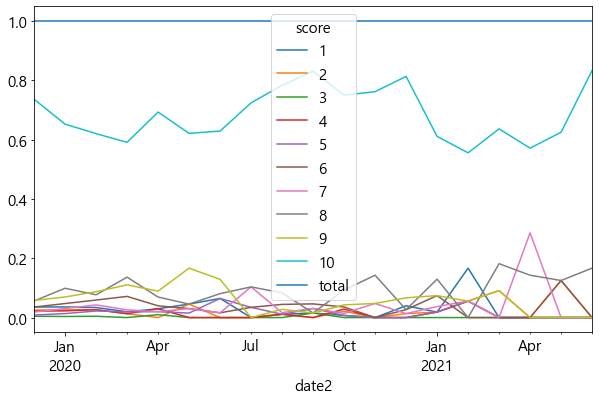

In [130]:
score_dist_monthly2_ratio.plot.line(figsize=(10,6))

위 그래프를 살펴보면 월별로 평점의 비율이 드라마틱하게 변하는 구간이 있다고 판단되지 않는다.  
알바가 만약 존재한다면, 영화 개봉 시점 근처에 주로 활동할 것이며 시간이 멀어질수록 활동할 가능성은 낮다고 판단된다. 따라서 월별로 평점의 비율이 바뀔 가능성이 크고 해당 데이터를 분포를 통해 확인해보자

[월별 평점 분포 그래프]

In [132]:
import matplotlib.font_manager as fm

In [133]:
font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


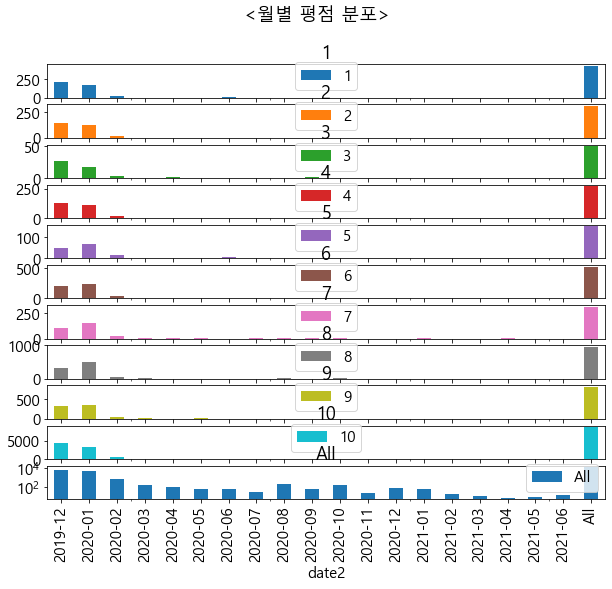

In [134]:
score_dist_monthly.plot.bar(stacked=True, subplots=True, title = '<월별 평점 분포>', figsize=(10,8))
plt.yscale('log', nonposy='clip')
#plt.legend('월별 평점 분포')
plt.show()

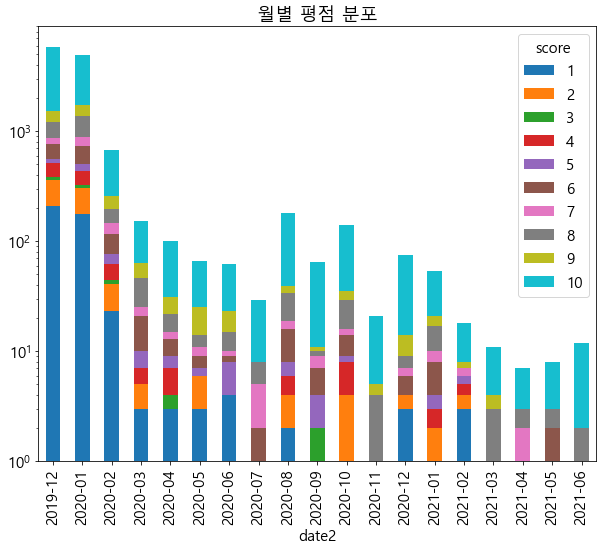

In [135]:
score_dist_monthly2.plot.bar(stacked=True, figsize=(10,8),  logy = True, title = '월별 평점 분포')
plt.show()